<a href="https://colab.research.google.com/github/Artem7davlet/artem_git/blob/main/MathStat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Арсен

In [ ]:
print("Арсен")

Арсен


Артем

# **Логистическая регрессия**

Логистическая регрессия используется для исследования взаимосвязи между номинативной зависимой переменной, имеющей всего 2 градации, и различными независимыми переменными (в качестве предикторов могут быть как номинативные, так и количественные переменные).
Номинативную переменную с двумя градациями можно представить как два зависимых друг от друга вероятностных исхода, равных p и (1 - p).
Тогда регрессионная модель, в которой зависимая переменная — это номинативная переменная с двумя градациями:

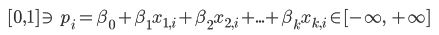

Мы хотим зависимую переменную выразить через линейную комбинацию предикторов, где коэффицент перед предиктором будет говорить о степени влияния этой независимой переменной на зависимую переменную

Первая проблема, с которой мы столкнёмся, это то, что левая часть уравнения это номинативная зависимая переменная с двумя градациями, а правая часть, это линейная комбинация наших предикторов, которая может выдавать нам в сумме число в промежутке (-∞, +∞)

Так как независимая переменная имеет две градации, можно перейти к непрерывному показателю, вероятности наступления положительного исхода, который варьируется от 0 до 1.  


Уравнение логистической регрессии:

\begin{equation}
\log(\text{odds}) = B_0 + B_1 x_1 + B_2 x_2 + \ldots + B_k x_k
\end{equation}, где log - натуральный логарифм, odds - шансы положительного исхода


\begin{equation}
p = \frac{1 + e^{\log(\text{odds})}}{e^{\log(\text{odds})}}
\end{equation}, где p - вероятность положительного исхода

Почему же тут используется натуральный логарифм шансов?

Проследим за различным соотношением положительных и отрицательных исходов и рассчитанными на их основе вероятностью, шансами и натуральным логарифмом шансов (далее просто "логарифм шансов").

Вероятность - число от нуля до единицы

Шансы - число от нуля до плюс бесконечности

Логарифм шансов - число от минус бесконечности до плюс бесконечности

Именно поэтому, нам лучше всего использовать его, зная логарифм шансов, мы можем рассчитать вероятность

# **Шансы и вероятность**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Разберем на примере подбрасывания монетки. Пусть у нас было 10 бросков и мы получили следующие результаты:

1 - орел (в примере мы хотим, чтобы выпадали орлы, это будет положительный исход)

0 - решка (отрицательный исход)

In [8]:
df = pd.DataFrame({'coin_state': [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]})
df

,coin_state
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [6]:
# 2 орла, 8 решек
df.coin_state.value_counts()

coin_state
0    8
1    2
Name: count, dtype: int64

Рассчитаем вероятность:
\begin{equation}
p = \frac{\text{pos}}{\text{pos} + \text{neg}}
\end{equation}

In [9]:
pos = df.coin_state.value_counts()[1]   # количество положительных исходов
neg = df.coin_state.value_counts()[0]   # количество отрицательных исходов

p = pos / (pos + neg)
p

0.2

Рассчитаем шансы:\begin{equation}
\text{odds} = \frac{\text{pos}}{\text{neg}}
\end{equation}

In [10]:
odds = pos / neg
odds

0.25

Шансы можно посчитать, зная вероятность:\begin{equation}
\text{odds} = \frac{p}{1-p}
\end{equation}

In [11]:
p / (1 - p)

0.25

Вероятность можно посчитать, зная шансы:\begin{equation}
p = \frac{\text{odds}}{1 + \text{odds}}
\end{equation}

In [12]:
odds / (1 + odds)

0.2

Визуализируем зависимость вероятности от логарифма шансов:


In [13]:
pd.DataFrame({
    'pos': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'neg': [10, 0, 8, 7, 6, 5, 4, 3, 2, 1, 0],
    'p': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'odds': [0, 0.11, 0.25, 0.43, 0.66, 1, 1.5, 2.33, 4, 9, np.nan],
    'log(odds)': [np.nan, -2.2, -1.39, -0.85, -0.41, 0, 0.41, 0.85, 1.39, 2.2, np.nan],
})

,pos,neg,p,odds,log(odds)
0,0,10,0.0,0.00,NaN
1,1,0,0.1,0.11,-2.20
2,2,8,0.2,0.25,-1.39
3,3,7,0.3,0.43,-0.85
4,4,6,0.4,0.66,-0.41
5,5,5,0.5,1.00,0.00
6,6,4,0.6,1.50,0.41
7,7,3,0.7,2.33,0.85
8,8,2,0.8,4.00,1.39
9,9,1,0.9,9.00,2.20


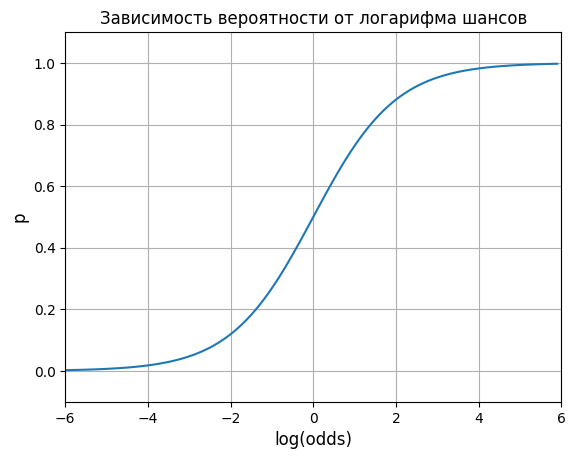

In [14]:
log_odds = np.arange(-6, 6, 0.1)
p = np.exp(log_odds) / (1 + np.exp(log_odds))

plt.plot(log_odds, p)
plt.grid()
plt.xlim(-6, 6)
plt.ylim(-0.1, 1.1)
plt.title('Зависимость вероятности от логарифма шансов', fontsize=12)
plt.xlabel('log(odds)', fontsize=12)
plt.ylabel('p', fontsize=12)

plt.show()
plt.close()

Картинка получше:


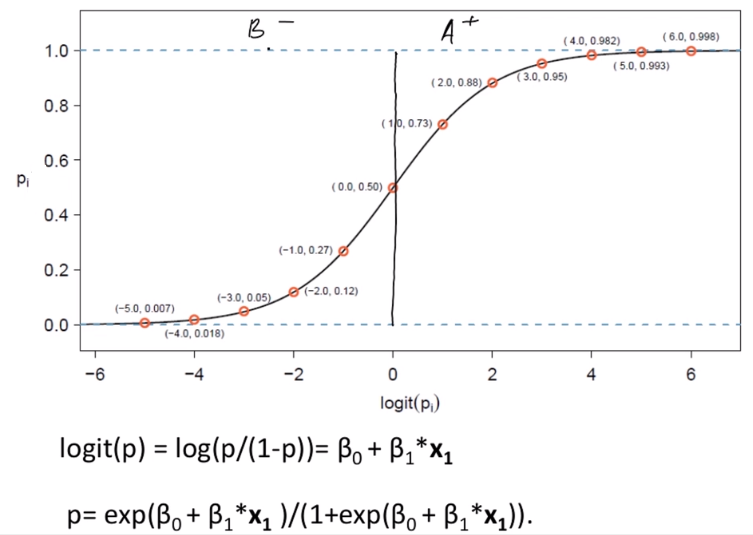

Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?

In [15]:
import math
math.log(30/70)

-0.8472978603872037

Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется...

In [16]:
math.exp(-1) / (1 + math.exp(-1))


0.2689414213699951

# Модель без предикторов (Intercept only model)

\begin{equation}
\log(\text{odds}) = B_0 + B_1 x_1 + B_2 x_2 + \ldots + B_k x_k
\end{equation}

Модель без предикторов описывается уравнением: y = intercept (одному числу, без предикторов)

Intercept - натуральный логарифм шансов положительного исхода. И свободный член логистической регресии.

Т.е. мы хотим предсказать логарифм шансов, используя только одно число: log( p/(1-p) ) = intercept


H0: Нет никакой разницы между исходом №1 и исходом №2 и нормальное распределение описывает распределение коэффициентов логистической регрессии:

p = 1 - p;
odds = 1;
Логарифм шансов logit(p) = 0 , т.е. logit(p) (он же intercept) имеет нормальное распределение со средним равным 0

Рассмотрим модели на примере известного датасета о Титанике

In [17]:
# Датасет Титаника
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
glm_binomial = smf.glm(formula='Survived ~ 1', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()
# Intercept - логарифм шансов (шансов выжить)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Sun, 12 May 2024   Deviance:                       964.52
Time:                        20:12:06   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):          3.331e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

Важное пояснение:

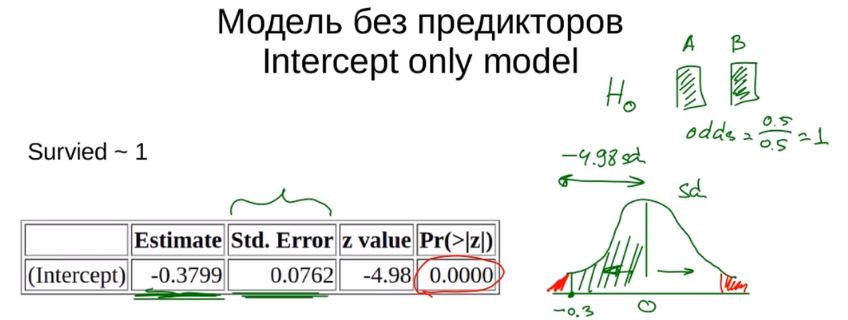

Интерпретация расчётной таблицы:

Estimate - значение intercept (логарифма шансов)

Полученная в расчётах стандартная ошибка (se) - это стандартное отклонение, которое имело бы нормальное распределение коэфициента intercept со средним равным 0

Тогда если разделить значение коэфициента intercept на стандартную ошибку, то получим z-value – расстояние до 0 в стандартных отклонениях.

Pr(>|z|) - значение p-value, т.е. вероятность получить такое или ещё более сильное отличие intercept от 0 при условии, что верна нулевая гипотеза

Итак, мы получили модель:

log(odds) = -0.3799

 Распределение частот ЗП:

In [19]:
df.Survived.value_counts()

Survived
0    424
1    290
Name: count, dtype: int64

<ipython-input-20-797073c09db0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='hls')


<Axes: xlabel='Survived', ylabel='count'>

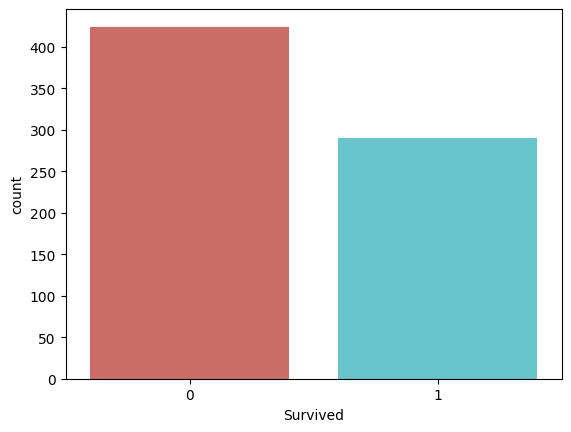

In [20]:
sns.countplot(x='Survived', data=df, palette='hls')

In [21]:
# df.Survived.value_counts()[1] - количество выживших 290
# df.Survived.value_counts()[0] - количество погибших 424
odds = df.Survived.value_counts()[1] / df.Survived.value_counts()[0]
odds

0.6839622641509434

In [22]:
# Логарифм шансов - это и есть Intercept.
log_odds = np.log(odds)
log_odds

-0.379852532251438

In [23]:
# Рассчитаем шансы:
odds = np.exp(log_odds)
odds

0.6839622641509434

In [24]:
# Рассчитаем вероятность:
p = odds / (1 + odds)
p

0.4061624649859944

In [25]:
# aic - показатель остатков модели.
# Чем он ниже, тем лучше модель (по аналогии с суммой квадратов остатков в линейной регрессии).
glm_binomial.aic

966.5159648555248

Задачка:

С помощью логистической регрессии без предикторов мы захотели узнать, правда ли,
что сдавая Сергею Владимировичу Симушкину, легче провалить экзамен, чем сдать.
В нашей выборке было 50 студентов. Часть из них сдала экзамен (положительный исход),
а часть - нет (отрицательный исход). Свободный член нашей регрессии оказался равен -0.8472979.
Сколько человек всё-таки сдало экзамен?

In [26]:
def find_n_sdalo (logit_p, n_vsego):
    p = math.exp(logit_p) / (1 + math.exp(logit_p))
    n_sdalo = round(p * n_vsego)
    return n_sdalo

logit_p = -0.8472979
n_vsego = 50

find_n_sdalo (logit_p, n_vsego)

15

Задачка:

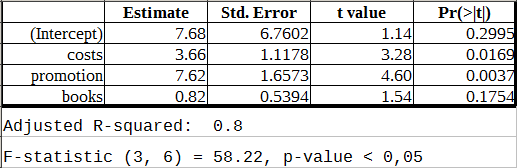

Исследователей заинтересовал вопрос, какие факторы взаимосвязаны с показателем кассовых сборов фильма. Для этих целей был применен множественный регрессионный анализ: зависимая переменная - сборы фильма в первый год после выхода на экраны - в миллионах долларов  (receipts)

Независимые переменные, которые были включены в анализ:

1. бюджет фильма (cost) - в миллионах долларов  

2. средства потраченные на рекламу фильма (promotion) -  в миллионах долларов

3. количество проданных книг, на основе которых был снят фильм (books) -  в миллионах проданных экземпляров

Основываясь на результатах анализа, постройте уравнение регрессии:

𝑟
𝑒
𝑐
𝑒
𝑖
𝑝
𝑡
𝑠
^
=
𝑏
0
+
𝑏
1
∗
𝑐
𝑜
𝑠
𝑡
+
𝑏
2
∗
𝑝
𝑟
𝑜
𝑚
𝑜
𝑡
𝑖
𝑜
𝑛
+
𝑏
3
∗
𝑏
𝑜
𝑜
𝑘
𝑠


К вам обратился продюсер, который снимает кино, он наслышан, что при помощи статистики можно получить ответы на все вопросы! Компания уже потратила 10 миллионов на производство фильма (cost), а также было продано 8 миллионов книг (books). Продюсер интересуется, сколько вы посоветуете ему потратить миллионов на рекламу фильма (promotion), если он хочет, чтобы сборы от фильма составили 150 миллионов?

# **Модель с одним номинативным предиктором:**

егг

In [ ]:
print("Артем")

Артем


Ильнар

#Кластерный анализ и метод главных компонент

Мы разберем два метода:
Метод K средних и метод главных компонент

##Зачем они нужны?

При помощи кластерного анализа мы научимся существует ли в наших данных подгруппы испытуемых и сколько таких групп. Этот метод также является одним из подходов "обучением без учителя".

In [ ]:
print("Ильнар")

Ильнар
